<a href="https://colab.research.google.com/github/inascu90/flutter-firstApp/blob/master/fireDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Dec 27 17:37:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 3.9 MB/s eta 0:00:00


https://universe.roboflow.com/2709-qrfck/fire-q29fp/dataset/1


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="s2tlRZRU7Mqg9iR0fnpD")
project = rf.workspace("reallyai-78cm0").project("fire_detection-lwcsv")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.230, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fire_Detection-1 in yolov8:: 100%|██████████| 19730/19730 [00:04<00:00, 4654.09it/s]


In [ ]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="s2tlRZRU7Mqg9iR0fnpD")
project = rf.workspace("reallyai-78cm0").project("fire_detection-lwcsv")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.230, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fire_Detection-1 in yolov8:: 100%|██████████| 19730/19730 [00:04<00:00, 4679.83it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="s2tlRZRU7Mqg9iR0fnpD")
project = rf.workspace("2709-qrfck").project("fire-q29fp")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.230, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fire-1 in yolov8:: 100%|██████████| 11910/11910 [00:01<00:00, 6175.45it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/fire-1/data.yaml epochs=20 imgsz=640 plots=True


New https://pypi.org/project/ultralytics/8.0.230 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/fire-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agn

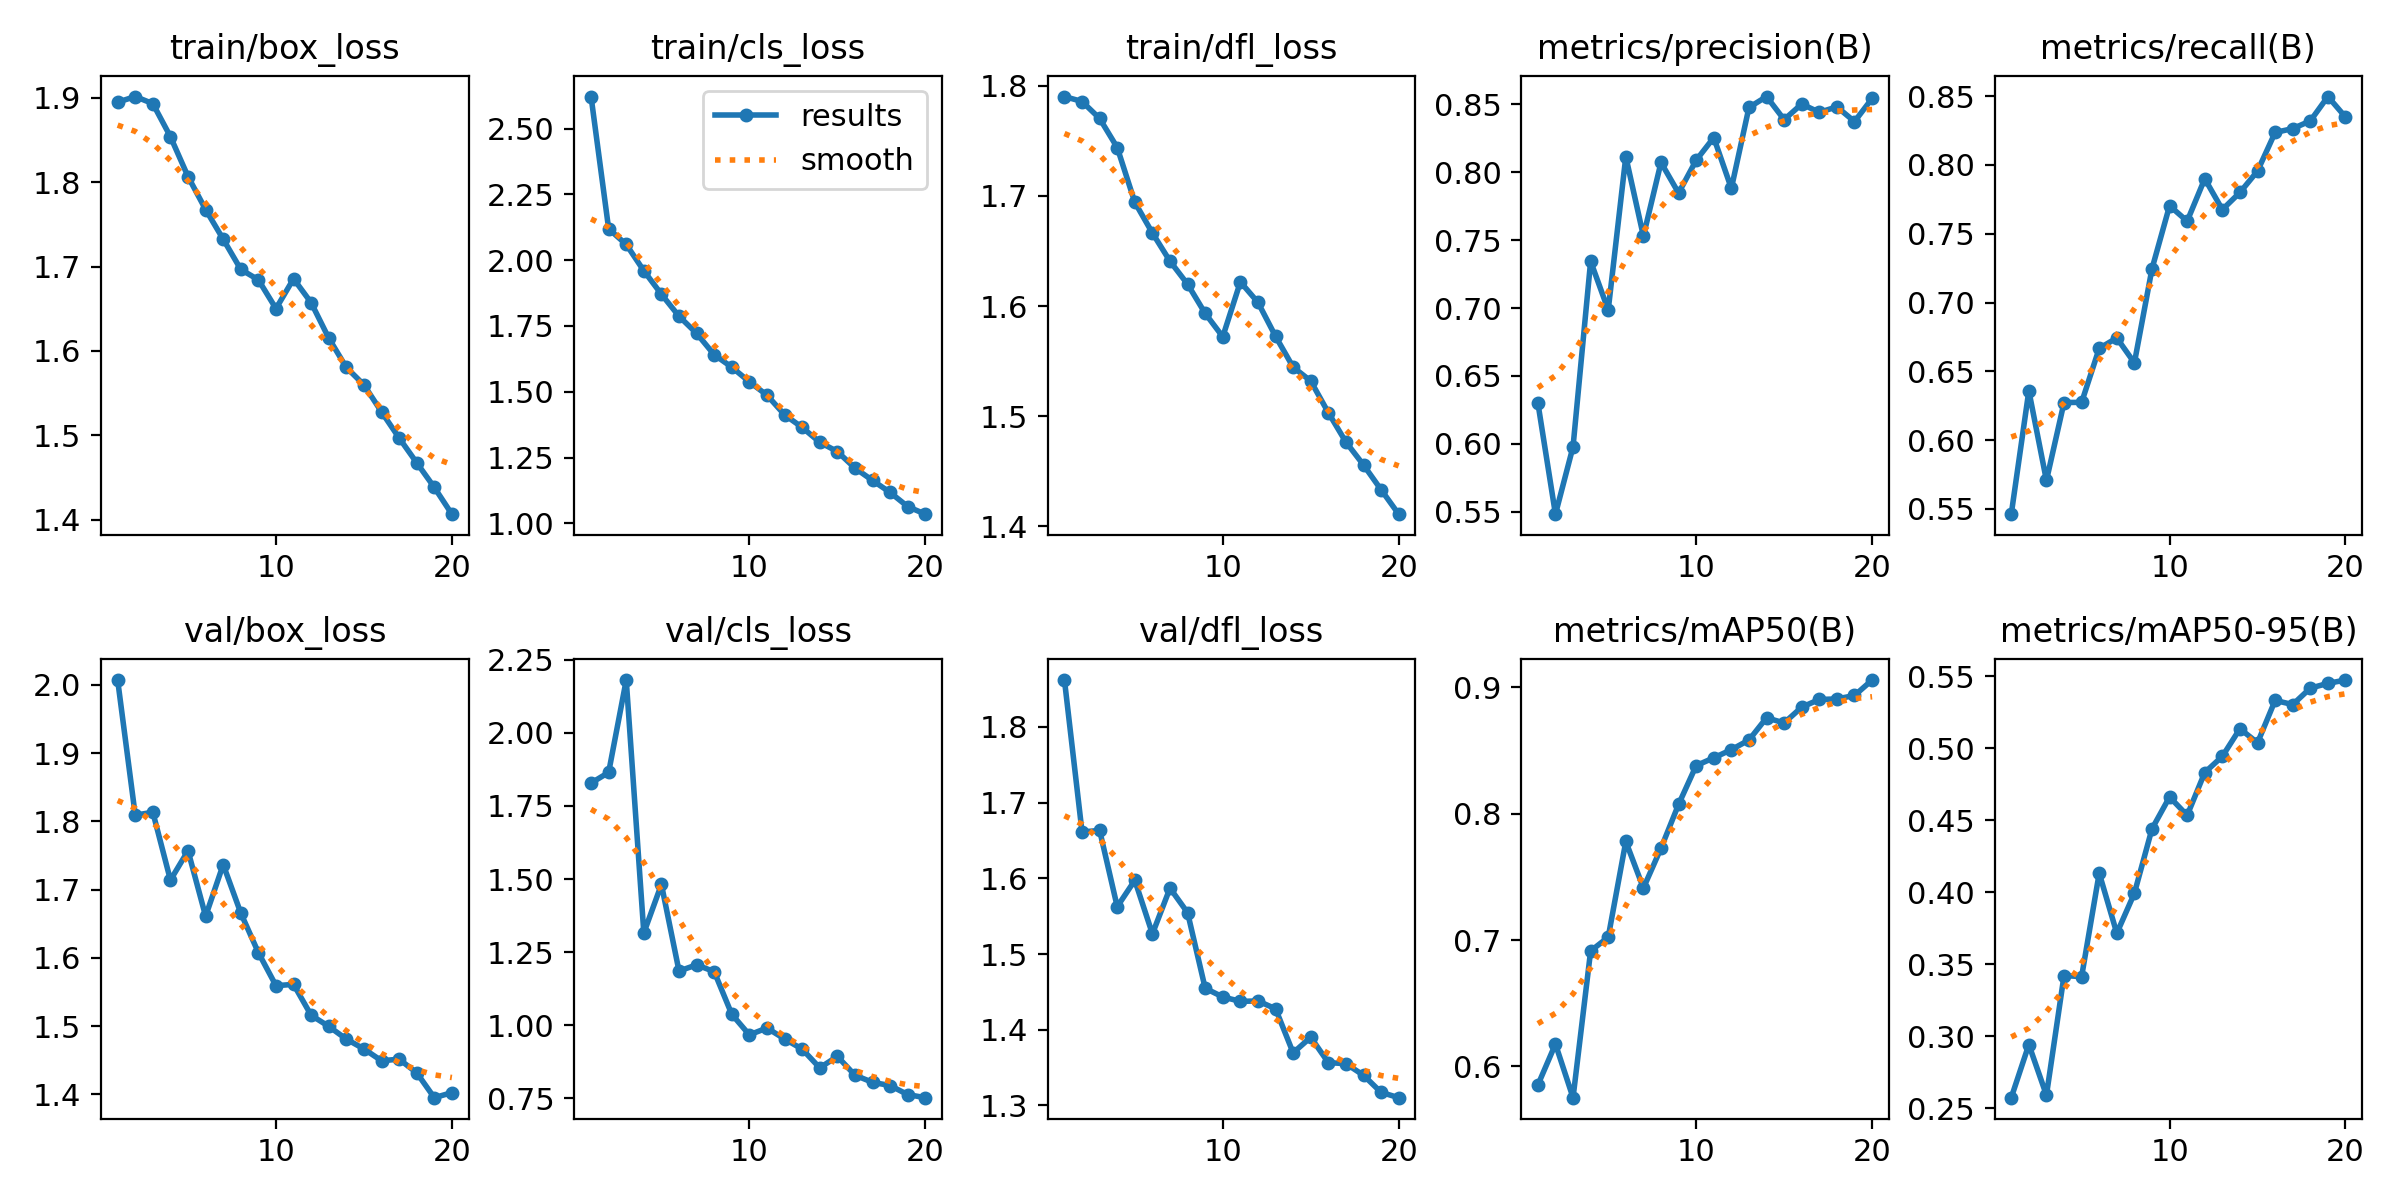

In [ ]:
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data='/content/fire-1/data.yaml'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/fire-1/valid/labels.cache... 192 images, 0 backgrounds, 0 corrupt: 100% 192/192 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:06<00:00,  1.92it/s]
                   all        192        357      0.857      0.835      0.902      0.546
                  Fire        192        357      0.857      0.835      0.902      0.546
Speed: 1.7ms preprocess, 10.8ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


/content


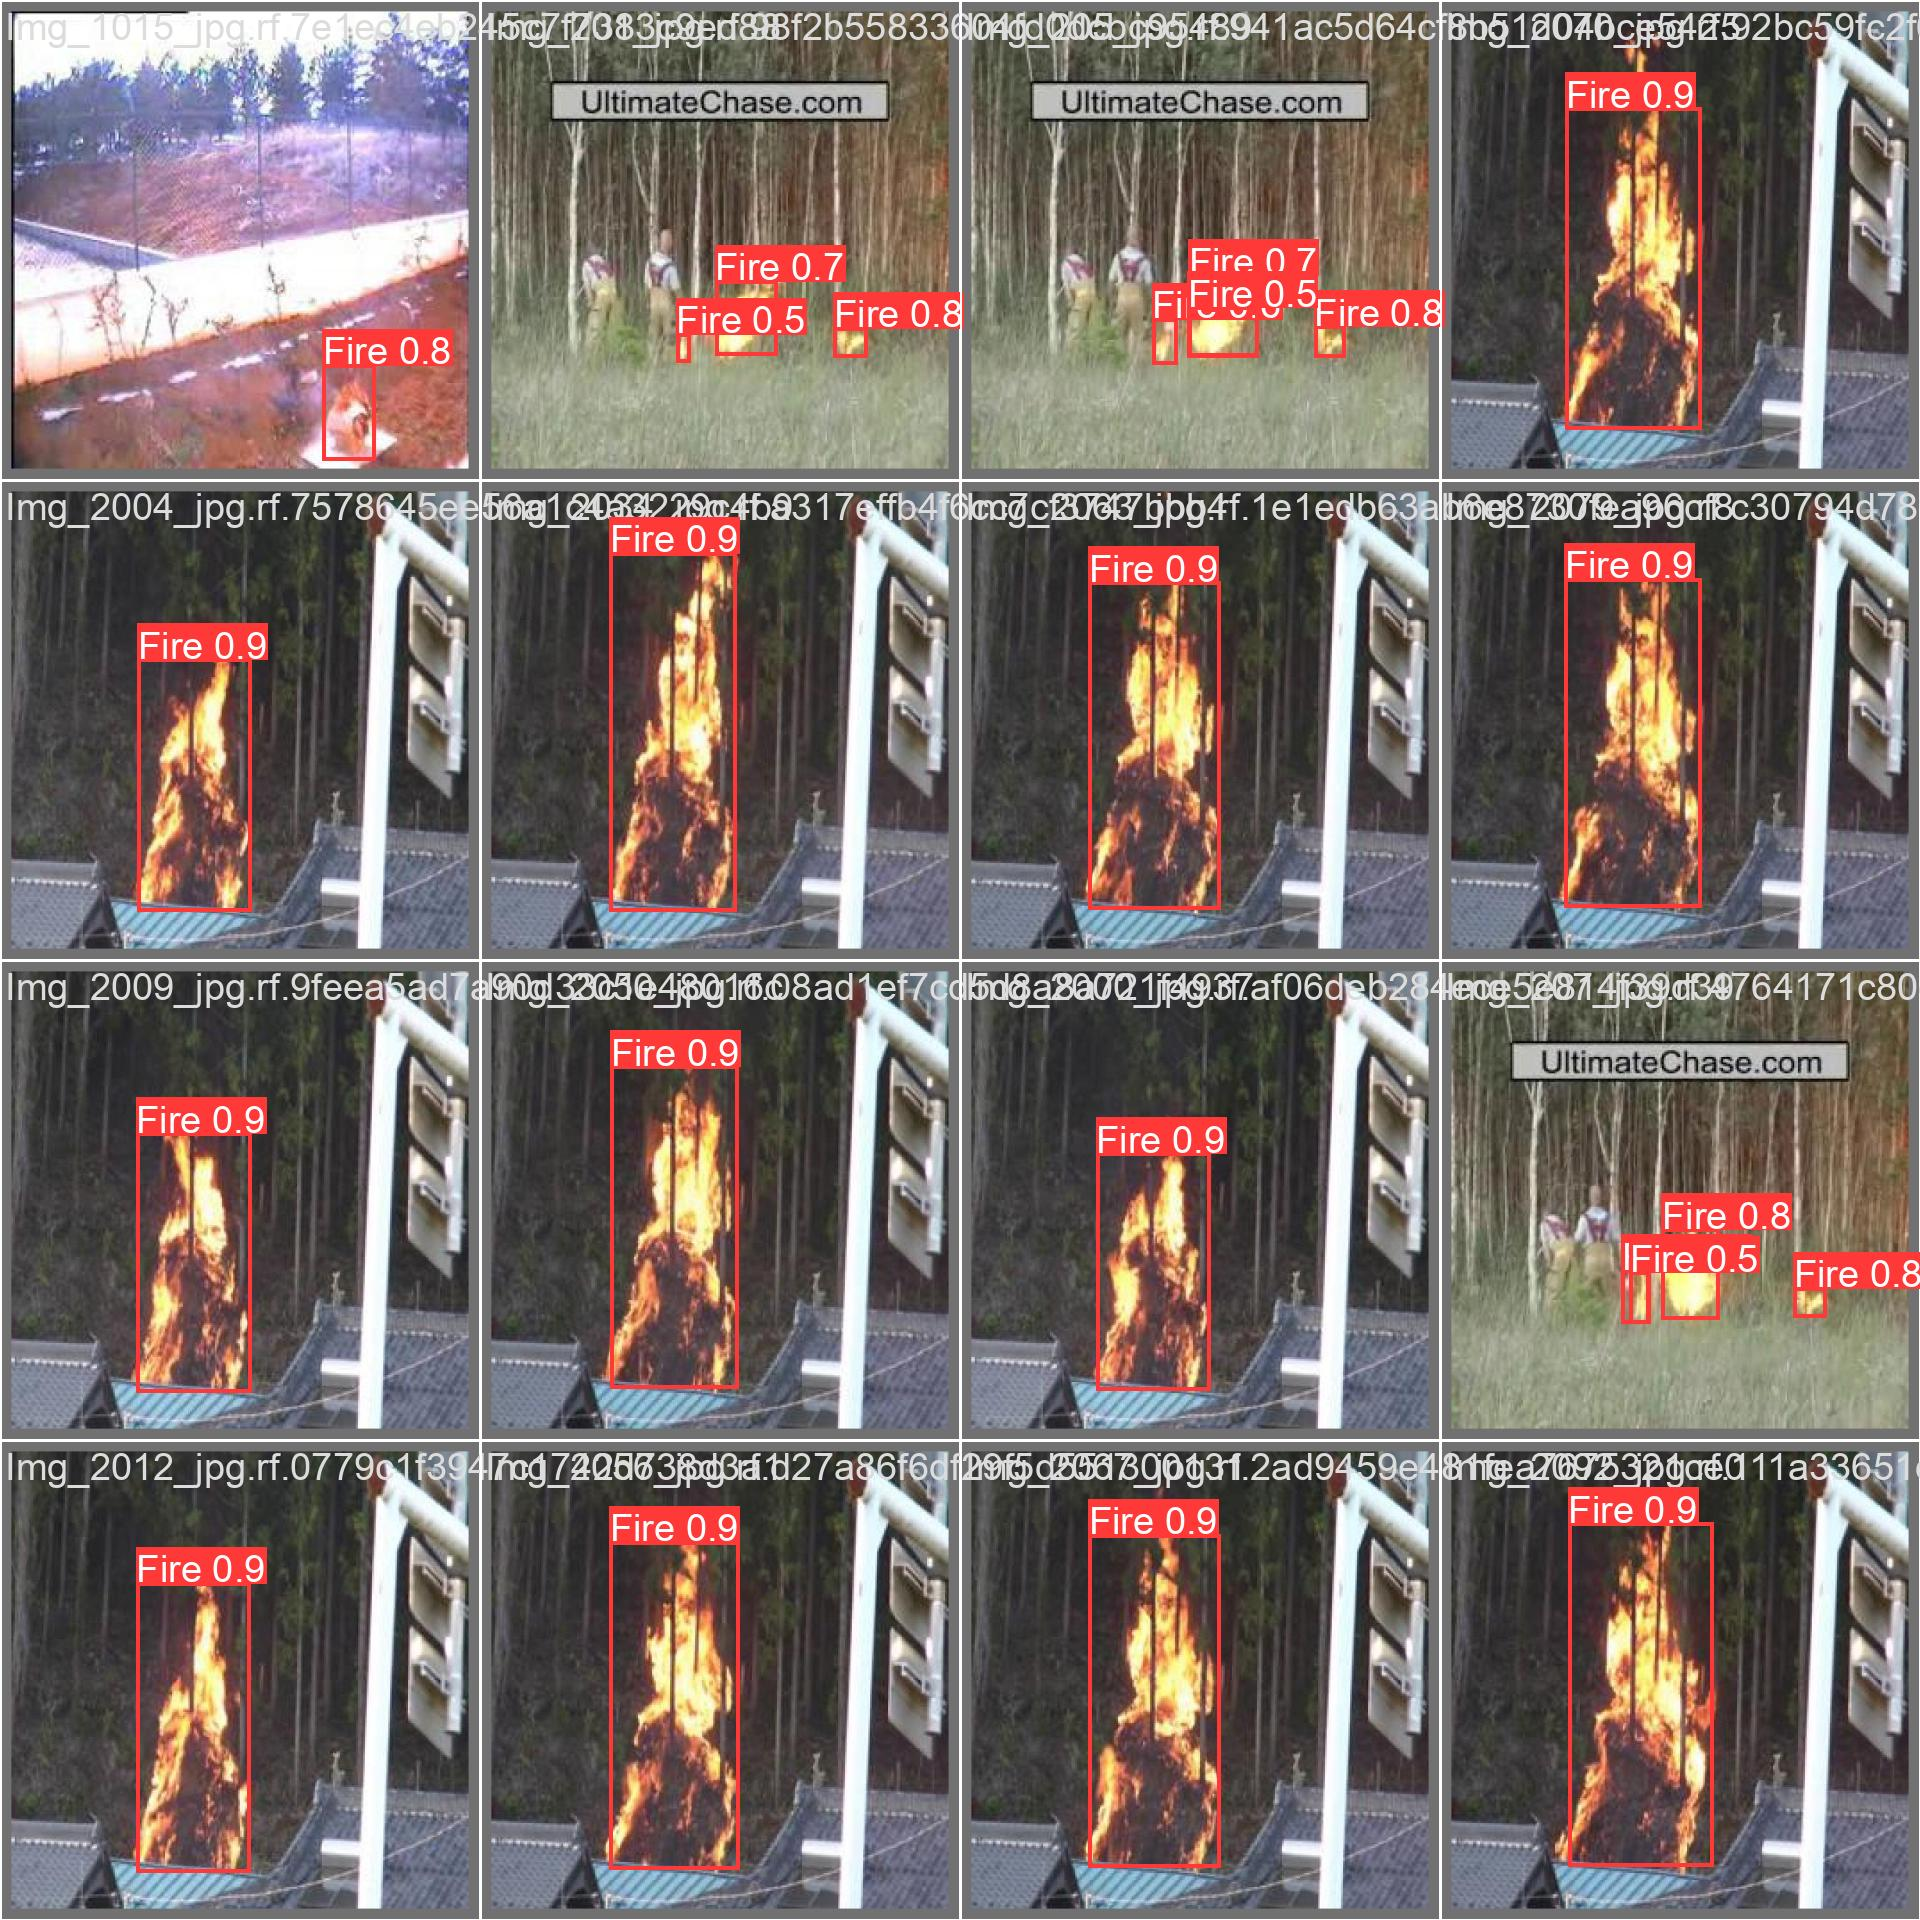

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source=/content/fire-1/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/100 /content/fire-1/test/images/Img_1029_jpg.rf.eb90bb32764701d37c161e39da8ab21a.jpg: 640x640 1 Fire, 16.3ms
image 2/100 /content/fire-1/test/images/Img_1047_jpg.rf.77ac2854805443abb335e2c0d8ec77cc.jpg: 640x640 1 Fire, 16.4ms
image 3/100 /content/fire-1/test/images/Img_1052_jpg.rf.32870a4d8f2cb60f22718dac805b1bf4.jpg: 640x640 1 Fire, 16.3ms
image 4/100 /content/fire-1/test/images/Img_1065_jpg.rf.5d55f9f8e0a4d999276ddddb3befb116.jpg: 640x640 1 Fire, 16.4ms
image 5/100 /content/fire-1/test/images/Img_1074_jpg.rf.ba348ed23e49750b0286970a062e6660.jpg: 640x640 1 Fire, 16.3ms
image 6/100 /content/fire-1/test/images/Img_107_jpg.rf.6a8aee390f33078d278a3e54307e32a0.jpg: 640x640 1 Fire, 16.3ms
image 7/100 /content/fire-1/test/images/Img_1090_jpg.rf.f697b347bdfb1f9e0e237cc29d6e7723.jpg: 640x640 1 Fire, 16.3ms
ima

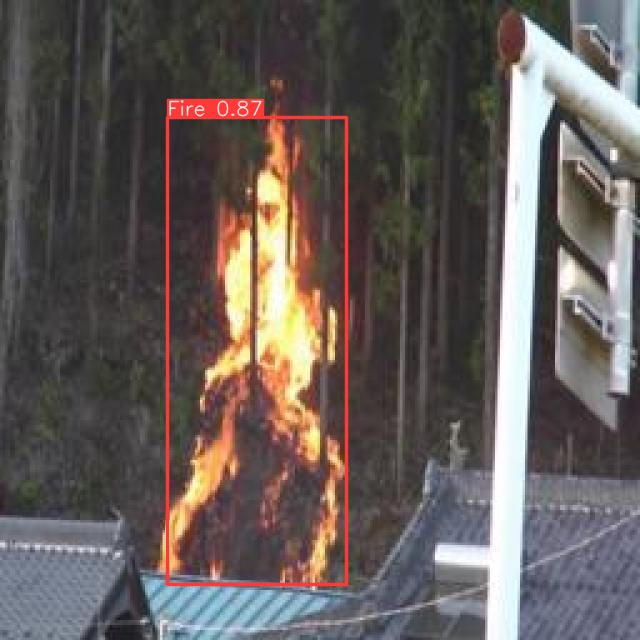

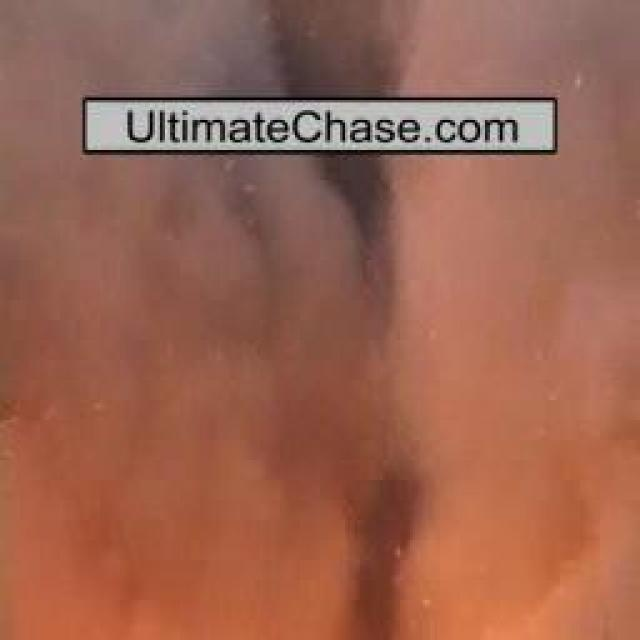

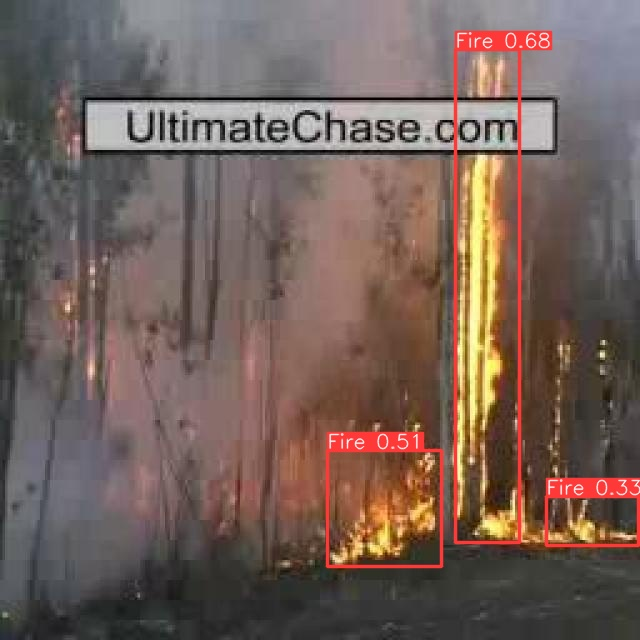

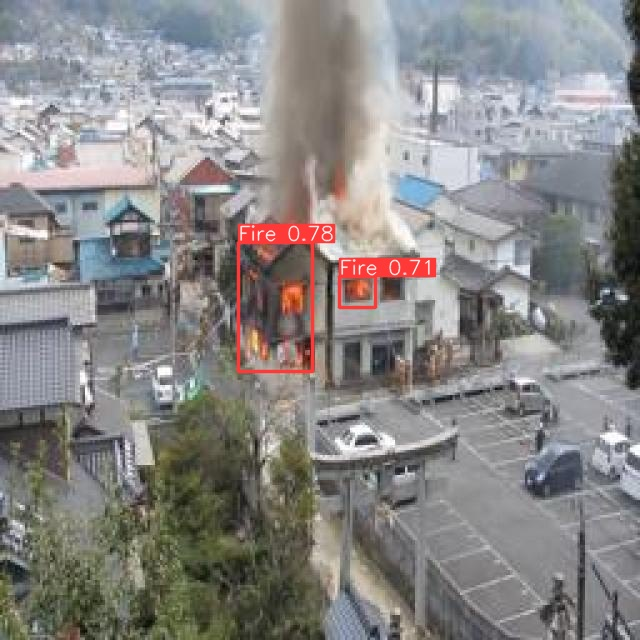

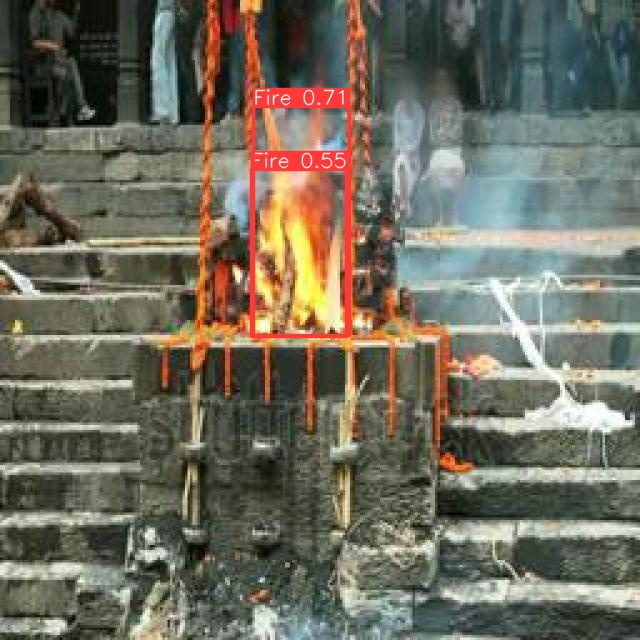

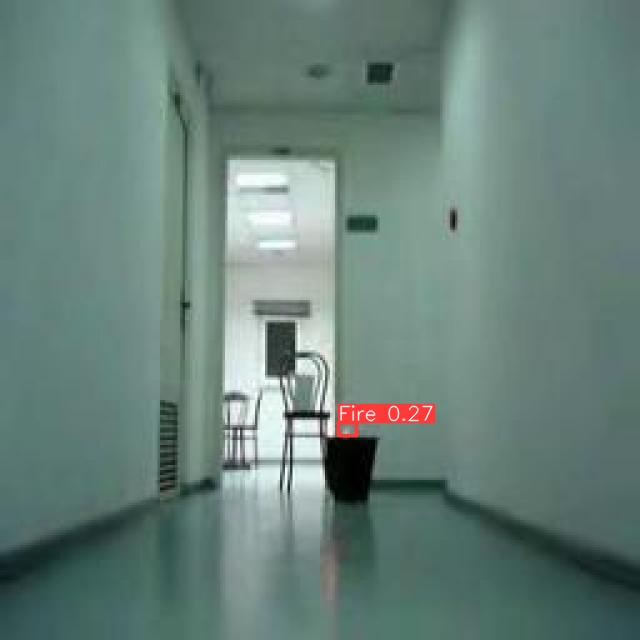

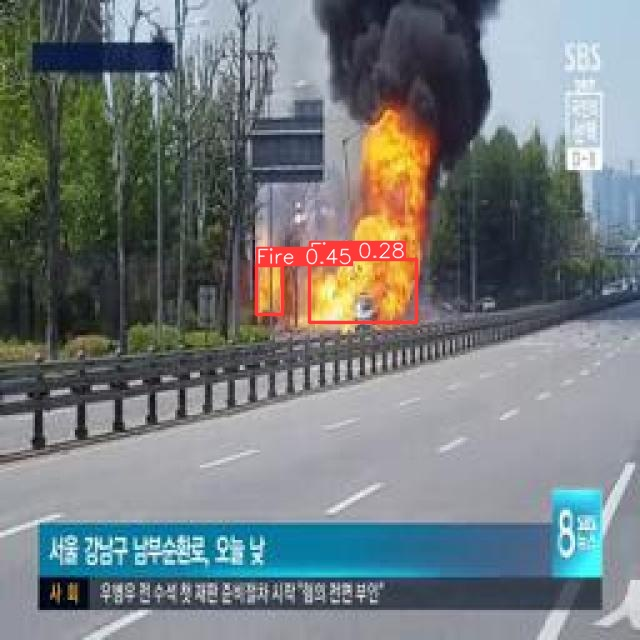

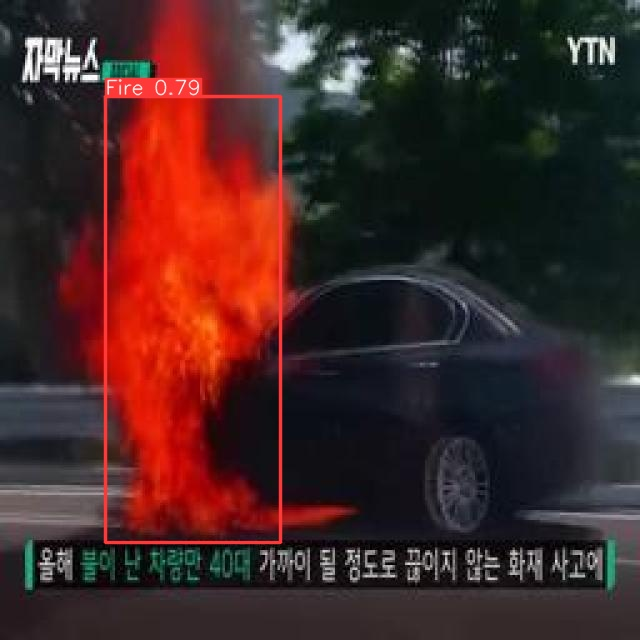

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:8]:
      display(Image(filename=image_path, width=600))
      print("\n")

**new data set **
https://universe.roboflow.com/fire-rqbio/fire-and-smoke-yikzn/dataset/2#

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="s2tlRZRU7Mqg9iR0fnpD")
project = rf.workspace("fire-rqbio").project("fire-and-smoke-yikzn")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 851.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully unins

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-and-smoke-2 in yolov8:: 100%|██████████| 6230/6230 [00:01<00:00, 5060.91it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/fire-and-smoke-2/data.yaml epochs=20 imgsz=640 plots=True


100% 21.5M/21.5M [00:00<00:00, 162MB/s]
New https://pypi.org/project/ultralytics/8.0.230 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/fire-and-smoke-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, li

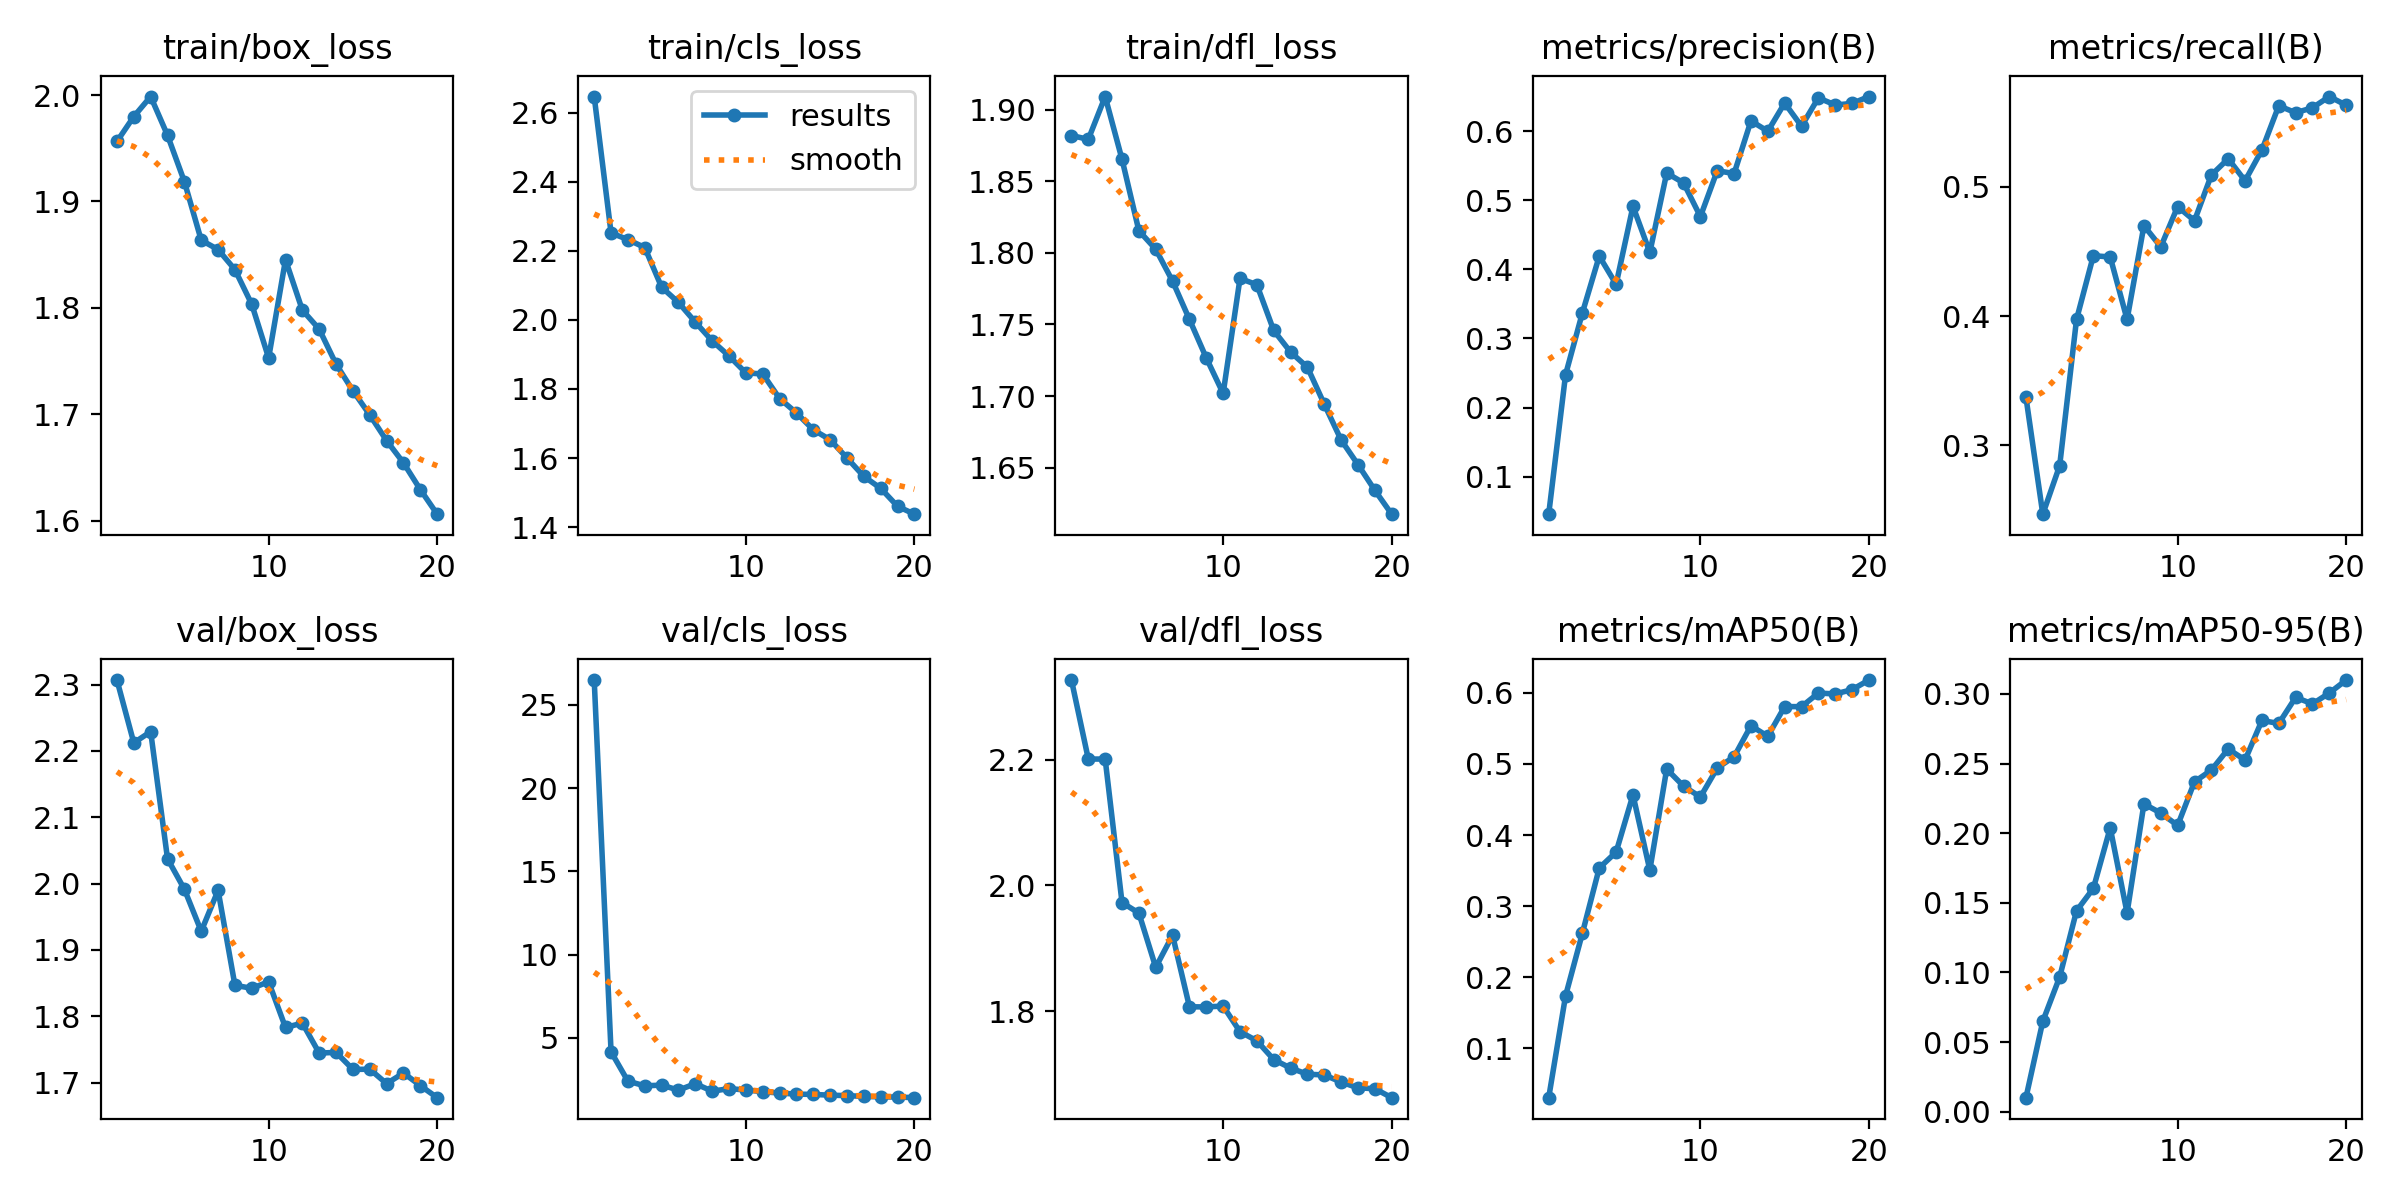

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data='/content/fire-and-smoke-2/data.yaml'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/fire-and-smoke-2/valid/labels.cache... 573 images, 1 backgrounds, 0 corrupt: 100% 573/573 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:11<00:00,  3.15it/s]
                   all        573       1073      0.649      0.562      0.618      0.311
                  fire        573        593      0.711      0.704       0.76      0.421
                 smoke        573        480      0.588      0.421      0.476        0.2
Speed: 2.3ms preprocess, 8.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/fire-and-smoke-2/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/366 /content/fire-and-smoke-2/test/images/00271_jpg.rf.855daa53cdf70bb1ca89c238c9a9ee8a.jpg: 640x640 2 smokes, 17.1ms
image 2/366 /content/fire-and-smoke-2/test/images/00388_jpg.rf.4e0c55102c9c2a908dd0e53bf71902e5.jpg: 640x640 3 smokes, 16.4ms
image 3/366 /content/fire-and-smoke-2/test/images/01114_jpg.rf.a7e62bf264be7dc34d43eaa240026912.jpg: 640x640 2 fires, 16.3ms
image 4/366 /content/fire-and-smoke-2/test/images/0200-2_jpg.rf.69c14f36824ed579ef1c47f2854d3ec9.jpg: 640x640 1 fire, 1 smoke, 16.3ms
image 5/366 /content/fire-and-smoke-2/test/images/02910_jpg.rf.ce823c02374c25ca84cb80f6215918a9.jpg: 640x640 1 smoke, 16.4ms
image 6/366 /content/fire-and-smoke-2/test/images/07717_jpg.rf.d00a0945b5e7a9c5337ecdce97d075b7.jpg: 640x640 1 smoke, 16.9ms
image 7/366 /conte

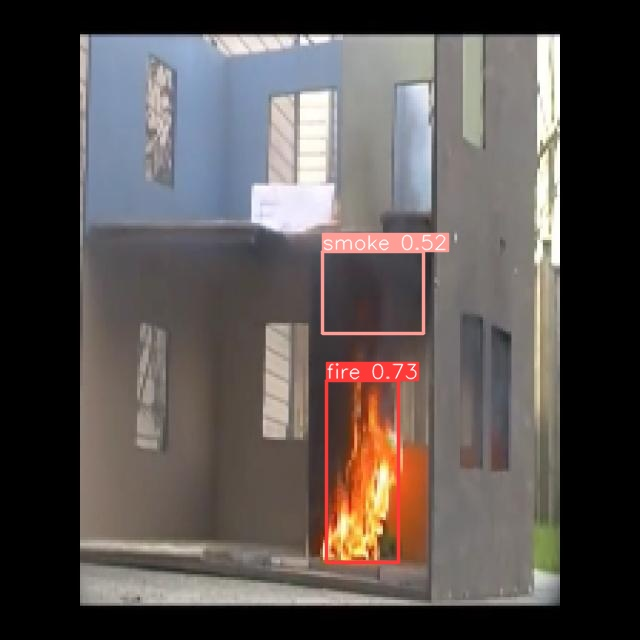

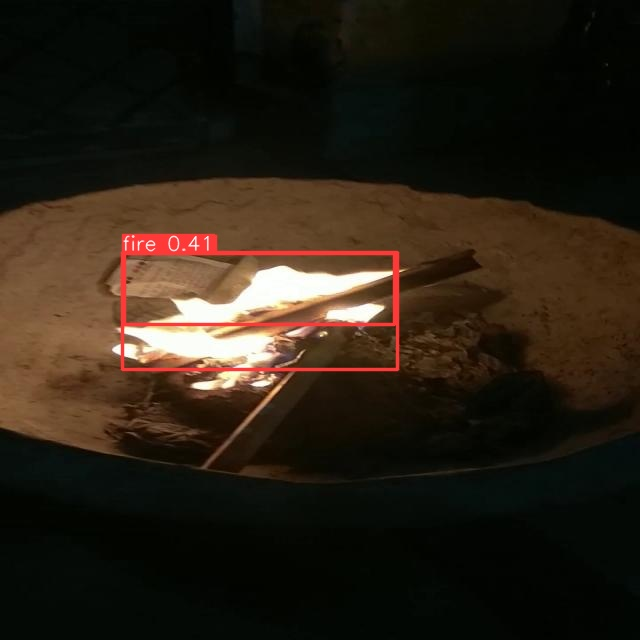

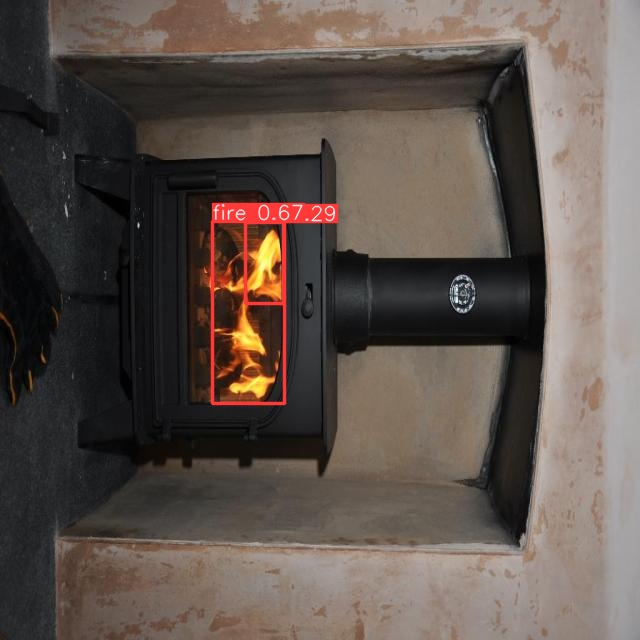

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
https://universe.roboflow.com/gabrielainteli/fire_detection-ihaqe/images/7mAtUqPJMPMQiWLCyxCS


https://universe.roboflow.com/gabrielainteli/fire_detection-ihaqe/images/7mAtUqPJMPMQiWLCyxCS


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="s2tlRZRU7Mqg9iR0fnpD")
project = rf.workspace("gabrielainteli").project("fire_detection-ihaqe")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire_Detection-2 in yolov8:: 100%|██████████| 11842/11842 [00:01<00:00, 6132.91it/s]


In [ ]:


!yolo task=detect mode=train model=yolov8l.pt data=/content/Fire_Detection-2/data.yaml epochs=20 imgsz=640 plots=True


New https://pypi.org/project/ultralytics/8.0.230 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Fire_Detection-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=

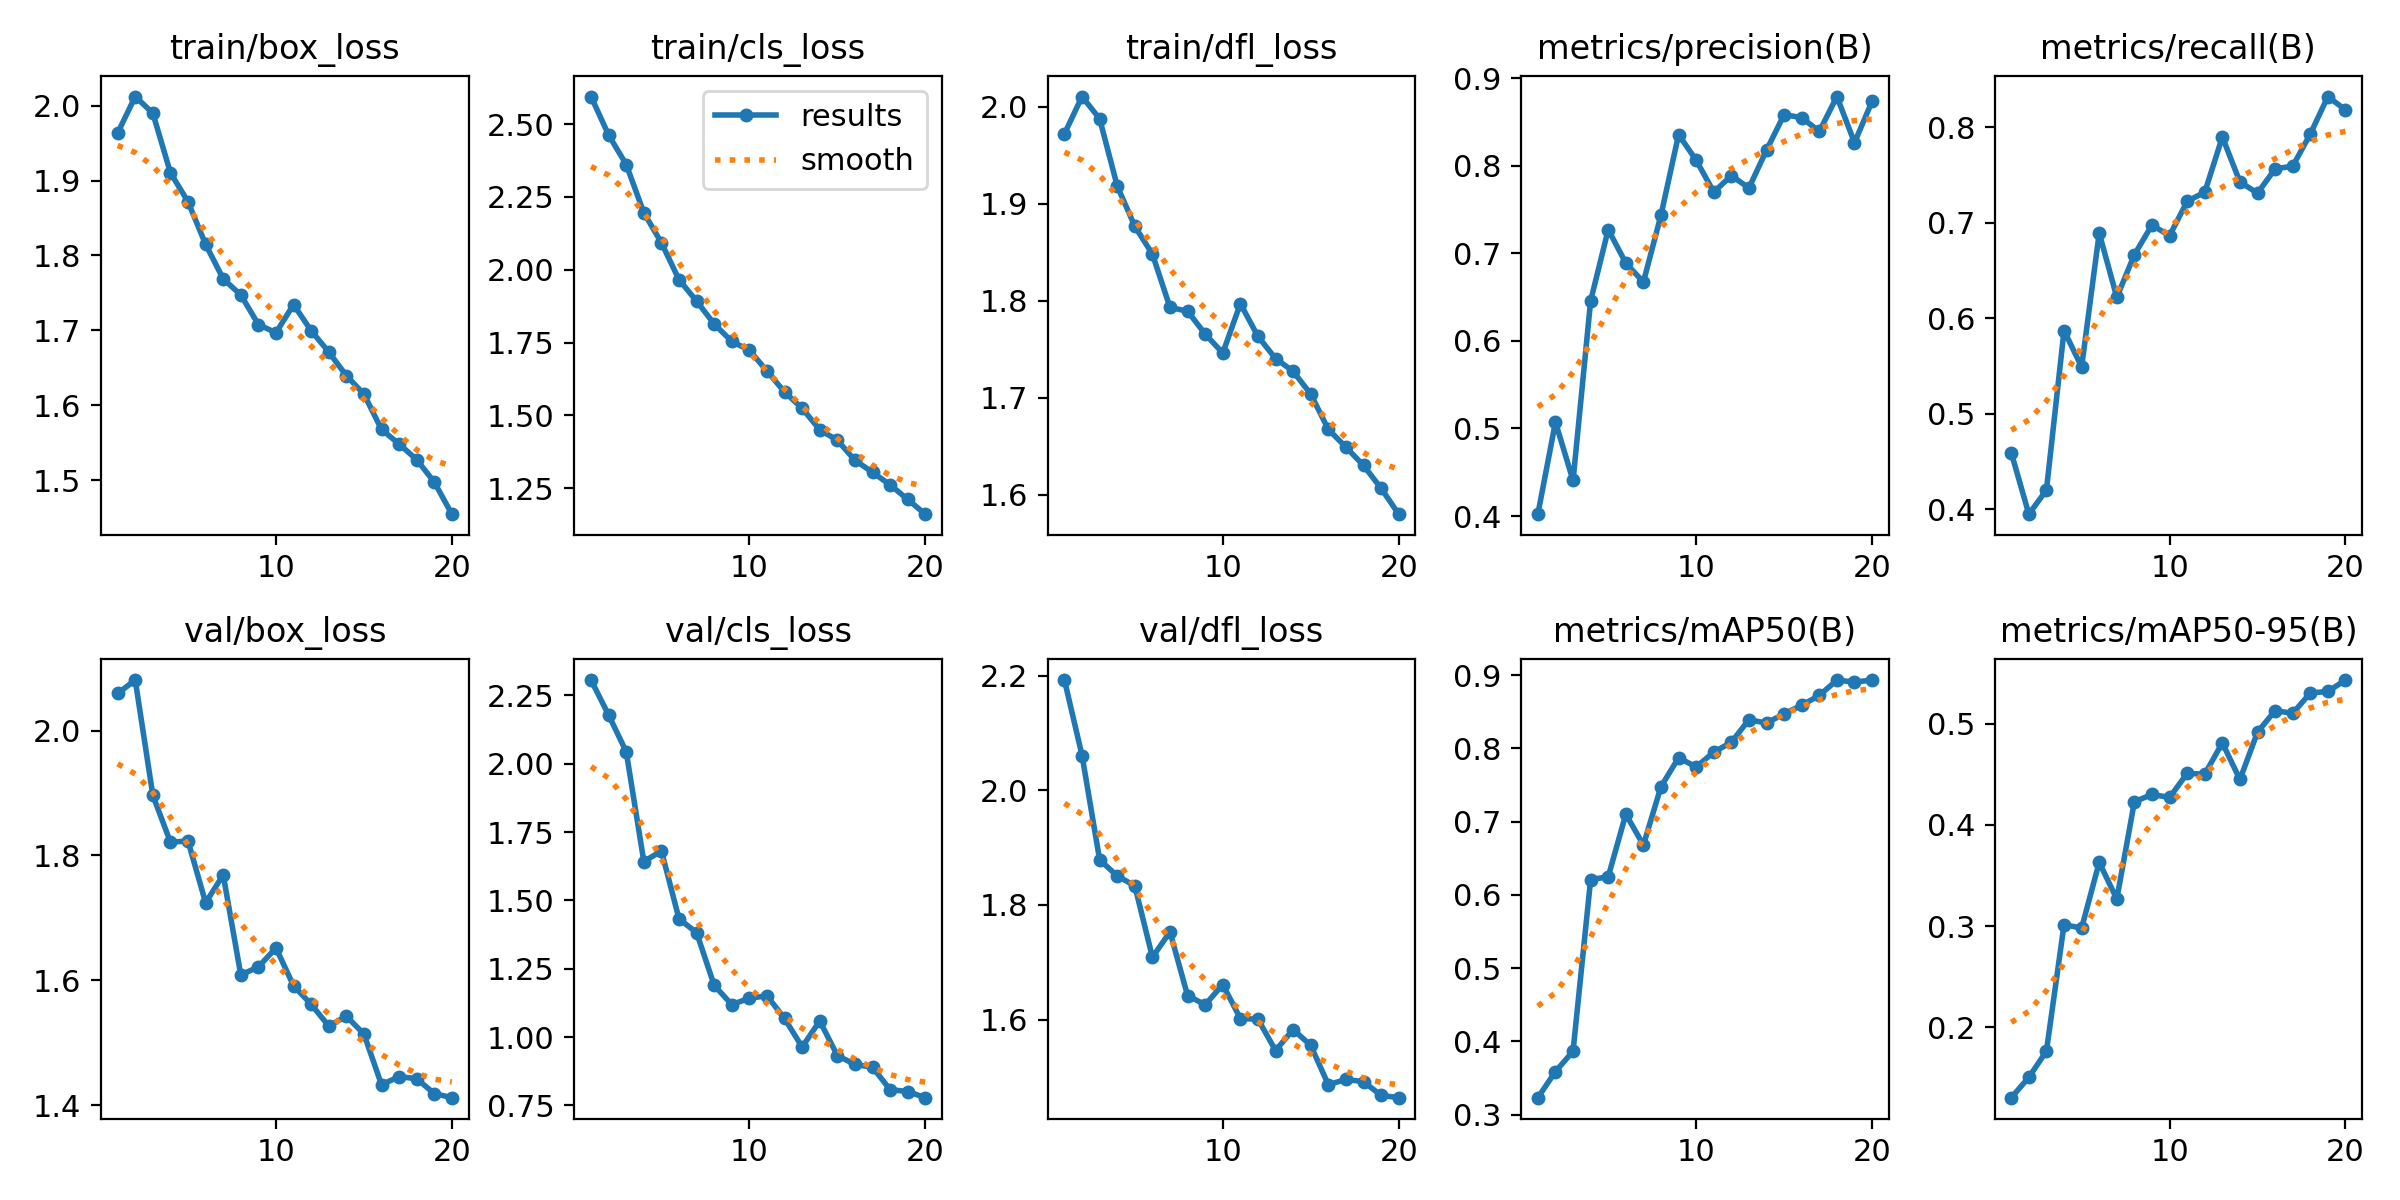

In [ ]:
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source=/content/Fire_Detection-2/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/100 /content/Fire_Detection-2/test/images/Img_1029_jpg.rf.3cf0653c75bdf6dece6b3c38bd2256a0.jpg: 640x640 1 0, 58.9ms
image 2/100 /content/Fire_Detection-2/test/images/Img_1047_jpg.rf.3ed9a360c328e6eeba906a4b3aa33db9.jpg: 640x640 1 0, 53.7ms
image 3/100 /content/Fire_Detection-2/test/images/Img_1052_jpg.rf.78b74245ced50ebd2368ee73d25d5542.jpg: 640x640 1 0, 53.6ms
image 4/100 /content/Fire_Detection-2/test/images/Img_1065_jpg.rf.159f51ddacced43600c14c460f981cf2.jpg: 640x640 1 0, 41.9ms
image 5/100 /content/Fire_Detection-2/test/images/Img_1074_jpg.rf.ba227f20d5b2765ae145b0852b4c9ba1.jpg: 640x640 1 0, 41.9ms
image 6/100 /content/Fire_Detection-2/test/images/Img_107_jpg.rf.77d642a7cb6d17026f83f4d4d58b7cef.jpg: 640x640 1 0, 41.7ms
image 7/100 /content/Fire_Detection

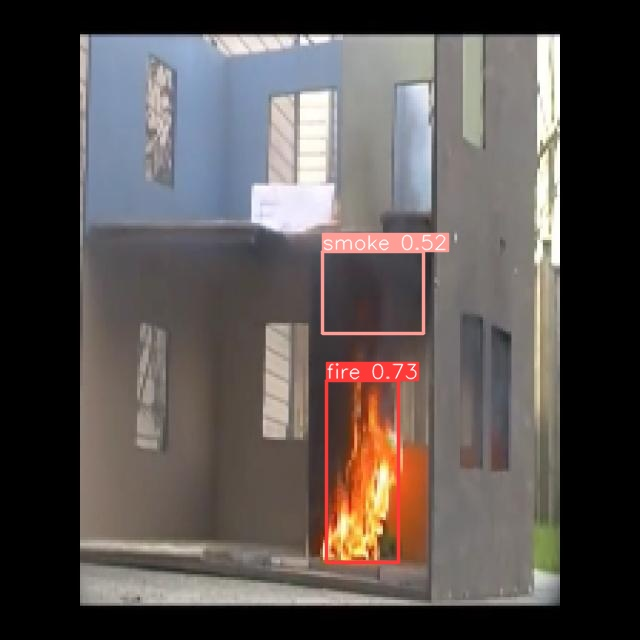

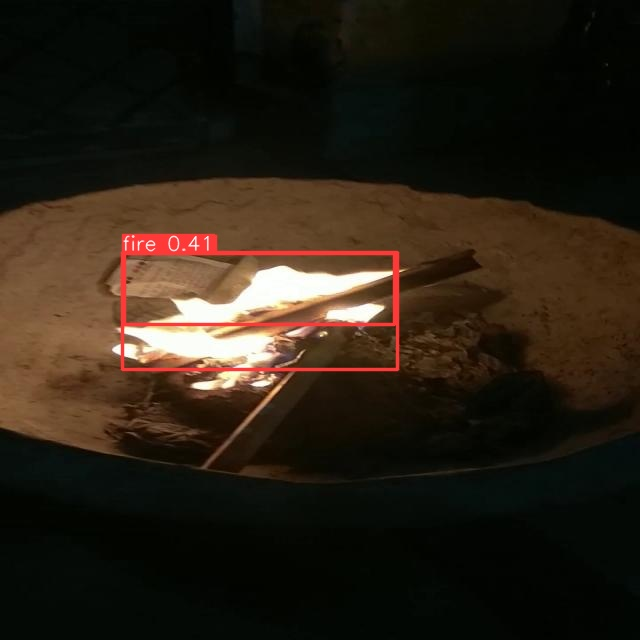

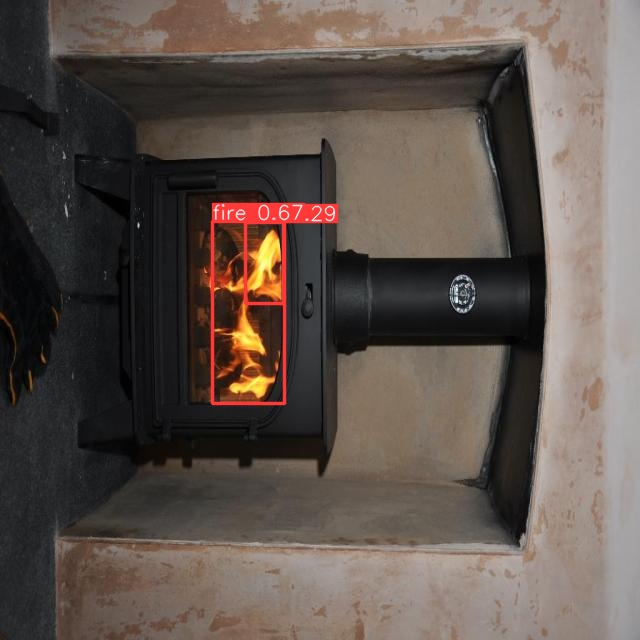

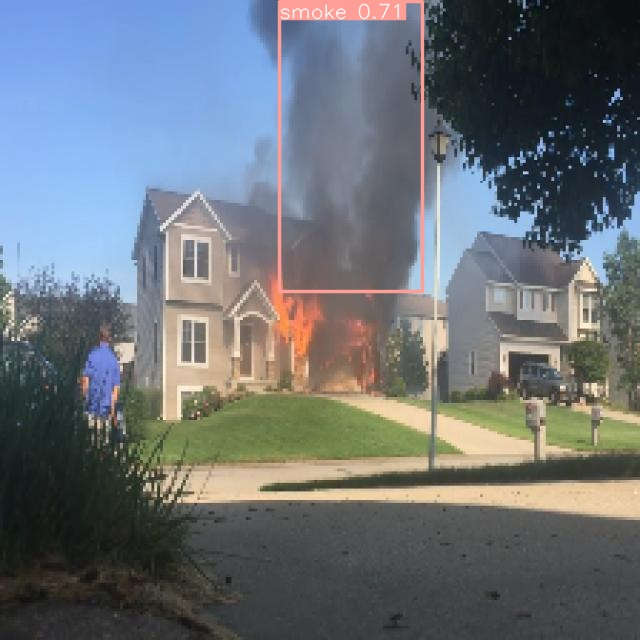

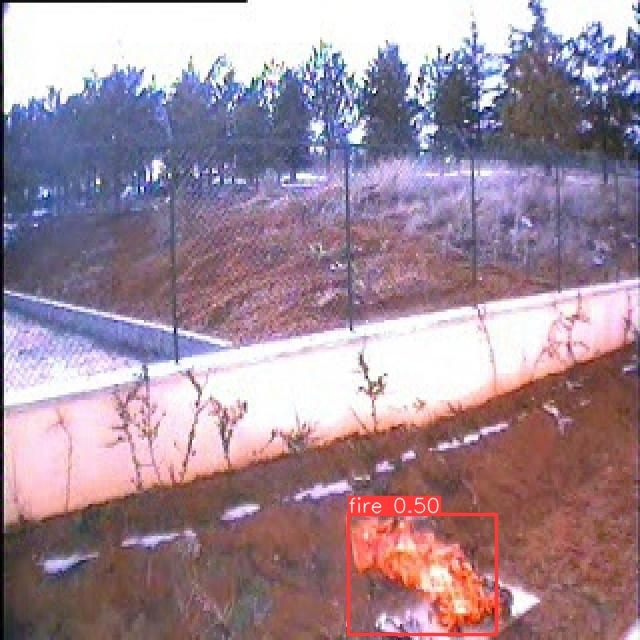

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")